In [1]:
import matplotlib.pyplot as plt
import random
from scipy import optimize, spatial
import numpy as np
import math
import pandas as pd

In [2]:
# Task 1

In [3]:
def apr_func(x, param):
  return (param[0] * x + param[1]) / (x ** 2 + x * param[2] + param[3])

In [4]:
length = 1001
eps = 0.001

x_k = []
y_k = []

for k in range(length):

  x_k.append(3 * k / 1000)
  f_x = apr_func(x_k[-1], [0,1,-3,2])

  if f_x < -100:
    y_k.append(-100 + random.normalvariate(0,1))

  elif f_x > 100:
    y_k.append(100 + random.normalvariate(0,1))

  else:
    y_k.append(f_x + random.normalvariate(0,1))

In [5]:
def apr_func_NM(param, x_k, y_k):
    return sum([(apr_func(x_k[i], param) - y_k[i]) ** 2 for i in range(length)])

def Nelder_Mead(func, initial_approx = [0.3, -0.1, 0.3, -0.1], disp = False):
    
    res = optimize.minimize(func, initial_approx, args = (x_k, y_k), method = 'nelder-mead', options = {'xatol': eps, 'disp': disp})
    
    return res.x[0], res.x[1], res.x[2], res.x[3], res.nfev, res.nit

In [6]:
def grad_num(func, args, eps = 1e-4):
    
    a, b, c, d = args[0], args[1], args[2], args[3]
    
    part_deriv_a = (func([a + eps, b, c, d]) - func([a - eps, b, c, d])) / (2 * eps)
    part_deriv_b = (func([a, b + eps, c, d]) - func([a, b - eps, c, d])) / (2 * eps)
    part_deriv_c = (func([a, b, c + eps, d]) - func([a, b, c - eps, d])) / (2 * eps)
    part_deriv_d = (func([a, b, c, d + eps]) - func([a, b, c, d - eps])) / (2 * eps)

    return np.array([part_deriv_a,  part_deriv_b, part_deriv_c, part_deriv_d])


def Levenberg_Marquardt(func, initial_approx = [0.3, -0.1, 0.3, -0.1]):
    
    reg_par = 0.0001
    args_prev = np.array(initial_approx)
        
    jac = np.array([grad_num(lambda args: func(x_i, args), args_prev) for x_i in x_k])
    inv_cond = np.linalg.inv(np.dot(jac.T, jac) + reg_par * np.diag(np.dot(jac.T, jac)) * np.eye(4))
        
    delta = np.dot(inv_cond, np.dot(jac.T, y_k - np.array([func(x_i, args_prev) for x_i in x_k])))
    args_curr = args_prev + delta

    calc_func, iterations = 8, 1
    
    while (np.linalg.norm(args_curr - args_prev) >= eps) and (iterations <= 1000):
        
        args_prev = args_curr
        
        jac = np.array([grad_num(lambda args: func(x_i, args), args_prev) for x_i in x_k])
        inv_cond = np.linalg.inv(np.dot(jac.T, jac) + reg_par * np.diag(np.dot(jac.T, jac)) * np.eye(4))
        delta = np.dot(inv_cond, np.dot(jac.T, y_k - np.array([func(x_i, args_prev) for x_i in x_k])))
        args_curr = args_prev + delta
        
        calc_func += 8
        iterations += 1

    return args_curr[0], args_curr[1], args_curr[2], args_curr[3], calc_func, iterations

In [ ]:
def Simulated_Annealing(func, left = [-2] * 4, right = [2] * 4):
    
    res = optimize.dual_annealing(func,  bounds=list(zip(left, right)), args=(x_k, y_k), maxiter=1000, accept=1)
    
    return res.x[0], res.x[1], res.x[2], res.x[3], res.nfev, res.nit

In [ ]:
def Differential_Evolution(func, left = [-2] * 4, right = [2] * 4):
    
    res = optimize.differential_evolution(func, bounds=list(zip(left, right)), args=(x_k, y_k), maxiter=1000)
    
    return res.x[0], res.x[1], res.x[2], res.x[3], res.nfev, res.nit

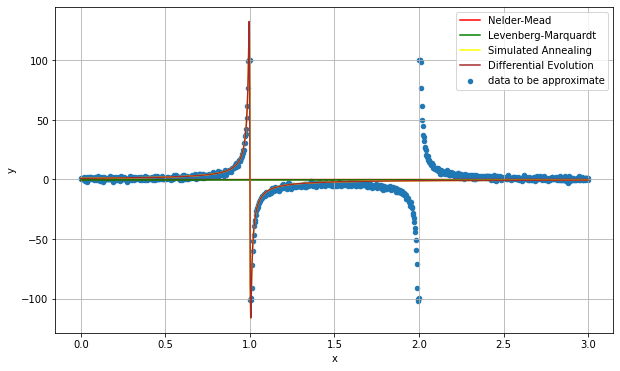

In [ ]:
NM = Nelder_Mead(apr_func_NM)
LM = Levenberg_Marquardt(apr_func)
SA = Simulated_Annealing(apr_func_NM)
DE = Differential_Evolution(apr_func_NM)

plt.figure(figsize=(10,6))
plt.scatter(x_k,y_k,label='data to be approximate', s=20)
plt.plot(x_k, [apr_func(x_k[i], NM[0:4]) for i in range(length)], label='Nelder-Mead', color='red')
plt.plot(x_k, [apr_func(x_k[i], LM[0:4]) for i in range(length)], label='Levenberg-Marquardt', color='green')
plt.plot(x_k, [apr_func(x_k[i], SA[0:4]) for i in range(length)], label='Simulated Annealing', color='yellow')
plt.plot(x_k, [apr_func(x_k[i], DE[0:4]) for i in range(length)], label='Differential Evolution', color='brown')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

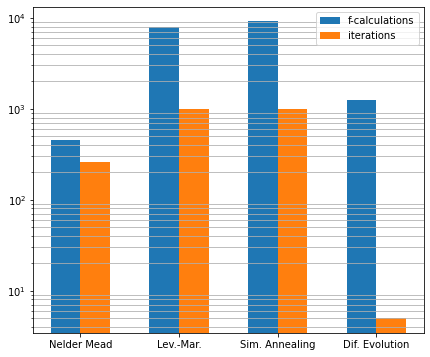

In [ ]:
cat_par = ['Nelder Mead','Lev.-Mar.','Sim. Annealing','Dif. Evolution']
g1 = [NM[4],LM[4],SA[4],DE[4]]
g2 = [NM[5],LM[5],SA[5],DE[5]]
width = 0.3
p = np.arange(len(cat_par))
fig, ax = plt.subplots(figsize=(7,6))
plt.yscale('log')
rects1 = ax.bar(p - width/2, g1, width, label='f-calculations')
rects2 = ax.bar(p + width/2, g2, width, label='iterations')
ax.set_xticks(p)
ax.set_xticklabels(cat_par)
ax.legend()
ax.grid(which='minor')

In [ ]:
# Task 2

In [2]:
file_input = open('Distance.txt', 'r')
distance_matrix = []

for line in file_input:
  distance_matrix.append(line.split())

distance_matrix = np.array(distance_matrix).astype(int)
file_input.close()
distance_matrix

array([[ 0, 29, 82, 46, 68, 52, 72, 42, 51, 55, 29, 74, 23, 72, 46],
       [29,  0, 55, 46, 42, 43, 43, 23, 23, 31, 41, 51, 11, 52, 21],
       [82, 55,  0, 68, 46, 55, 23, 43, 41, 29, 79, 21, 64, 31, 51],
       [46, 46, 68,  0, 82, 15, 72, 31, 62, 42, 21, 51, 51, 43, 64],
       [68, 42, 46, 82,  0, 74, 23, 52, 21, 46, 82, 58, 46, 65, 23],
       [52, 43, 55, 15, 74,  0, 61, 23, 55, 31, 33, 37, 51, 29, 59],
       [72, 43, 23, 72, 23, 61,  0, 42, 23, 31, 77, 37, 51, 46, 33],
       [42, 23, 43, 31, 52, 23, 42,  0, 33, 15, 37, 33, 33, 31, 37],
       [51, 23, 41, 62, 21, 55, 23, 33,  0, 29, 62, 46, 29, 51, 11],
       [55, 31, 29, 42, 46, 31, 31, 15, 29,  0, 51, 21, 41, 23, 37],
       [29, 41, 79, 21, 82, 33, 77, 37, 62, 51,  0, 65, 42, 59, 61],
       [74, 51, 21, 51, 58, 37, 37, 33, 46, 21, 65,  0, 61, 11, 55],
       [23, 11, 64, 51, 46, 51, 51, 33, 29, 41, 42, 61,  0, 62, 23],
       [72, 52, 31, 43, 65, 29, 46, 31, 51, 23, 59, 11, 62,  0, 59],
       [46, 21, 51, 64, 23, 59, 33

In [3]:
file_input = open('Coords.txt', 'r')
coords = []

for line in file_input:
  coords.append(line.split())

coords = np.array(coords).astype(float)
file_input.close()
coords

array([[ 5.49963e-08,  9.85808e-09],
       [-2.88733e+01, -7.97739e-08],
       [-7.92916e+01, -2.14033e+01],
       [-1.46577e+01, -4.33896e+01],
       [-6.47473e+01,  2.18982e+01],
       [-2.90585e+01, -4.32167e+01],
       [-7.20785e+01,  1.81581e-01],
       [-3.60366e+01, -2.16135e+01],
       [-5.04808e+01,  7.37447e+00],
       [-5.05859e+01, -2.15882e+01],
       [-1.35819e-01, -2.87293e+01],
       [-6.50866e+01, -3.60625e+01],
       [-2.14983e+01,  7.31942e+00],
       [-5.75687e+01, -4.32506e+01],
       [-4.30700e+01,  1.45548e+01]])

In [4]:
def calculate_distance(path):

  distance = distance_matrix[path[len(path)-1], path[0]]

  for i in range(len(path)-1):

    distance += distance_matrix[path[i], path[i+1]]

  return distance


def change_path(path):

  i = np.random.randint(len(path))
  j = i

  while i == j:

    j = np.random.randint(len(path))

  new_path = path.copy()
  new_path[i], new_path[j] = path[j], path[i]

  return new_path


def Simulated_Annealing_TSP(alpha = 0.98, t_init = 100.0, t_final = 1, 
                            best_solution=np.array([0, 12, 1, 14, 8, 4, 6, 2, 11, 13, 9, 7, 5, 3, 10, 0])):
  
  n_cities = len(best_solution) - 1

  initial_solution = np.arange(n_cities)
  path_curr = initial_solution.copy()
  initial_solution = np.append(initial_solution, initial_solution[0])

  t_curr = t_init

  value_curr = calculate_distance(path_curr)
  path_best = path_curr.copy()
  value_best = value_curr
  record_best = []
  record_curr  = []

  iter = 0

  while t_curr >= t_final:

    for k in range(n_cities):

      path_new = change_path(path_curr)
        
      value_new = calculate_distance(path_new)
      delta_E = value_new - value_curr

      if delta_E < 0:

        accept = True

        if value_new < value_best:

          path_best[:] = path_new[:]
          value_best = value_new

      else:

        pAccept = math.exp(-delta_E/t_curr)

        if pAccept > random.random():

          accept = True

        else:

          accept = False

      if accept == True:

        path_curr[:] = path_new[:]
        value_curr = value_new

    path_curr = np.roll(path_curr, 2)

    record_best.append(value_best)
    record_curr.append(value_curr)

    iter = iter + 1
    t_curr = t_curr * alpha

  path_best = np.append(path_best, path_best[0])

  return np.array([initial_solution, path_best, best_solution])

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14  0]
 [ 2 11 13  9  5  3 10  0 12  1  7  8 14  4  6  2]
 [ 0 12  1 14  8  4  6  2 11 13  9  7  5  3 10  0]]


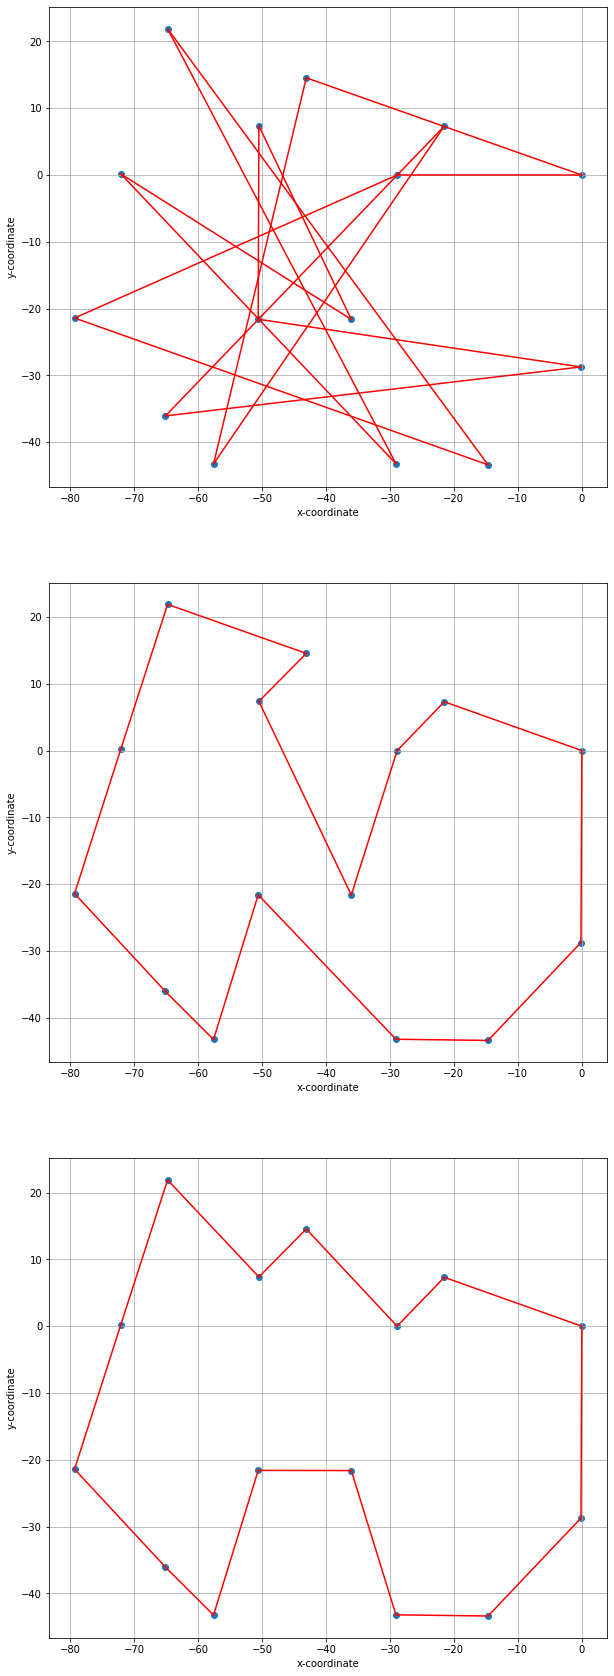

In [11]:
res = Simulated_Annealing_TSP()
print(res)

fig, ax = plt.subplots(figsize = (10, 30))

for j in range(len(res)):
  plt.subplot(3, 1, j + 1)
  plt.scatter(coords[:, 0], coords[:, 1])
  for i in range(len(res[0]) - 1):
    plt.plot([coords[res[j][i], 0],coords[res[j][i+1], 0]], [coords[res[j][i], 1],coords[res[j][i+1], 1]], color = 'red')
  plt.grid()
  plt.xlabel('x-coordinate')
  plt.ylabel('y-coordinate')
plt.show()

In [12]:
pd.DataFrame(data=[[res[0],calculate_distance(res[0])],[res[1],calculate_distance(res[1])],[res[2],calculate_distance(res[2])]], columns=['sequence','distance'], index=['init. path','last iter.','best path'])

,sequence,distance
init. path,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",817
last iter.,"[2, 11, 13, 9, 5, 3, 10, 0, 12, 1, 7, 8, 14, 4...",321
best path,"[0, 12, 1, 14, 8, 4, 6, 2, 11, 13, 9, 7, 5, 3,...",291
